In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()
print('Setup Complete')

Setup Complete


In [2]:
#downloading data

car_names_df = pd.read_table('car.names', header=None)
col_names = [ 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'condition']
df = pd.read_csv('car.data', names = col_names, header=None, index_col= False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buying     1728 non-null   object
 1   maint      1728 non-null   object
 2   doors      1728 non-null   object
 3   persons    1728 non-null   object
 4   lug_boot   1728 non-null   object
 5   safety     1728 non-null   object
 6   condition  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
X,y = df.iloc[:,0:], df.iloc[:,-2]

In [6]:
X

,buying,maint,doors,persons,lug_boot,safety,condition
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [10]:
#encoding data with column trdansfer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,4,5])], remainder='drop')
X = np.array(ct.fit_transform(X))



In [14]:
X.shape

(1728, 12)

In [15]:
#encoding data with label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [93]:
y

array([1, 2, 0, ..., 1, 2, 0])

In [16]:
#Split data 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

model = RandomForestClassifier(n_estimators=200)
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3)*100)


[[ 70  46  50]
 [ 92  31  46]
 [100  48  36]]
              precision    recall  f1-score   support

           0       0.27      0.42      0.33       166
           1       0.25      0.18      0.21       169
           2       0.27      0.20      0.23       184

    accuracy                           0.26       519
   macro avg       0.26      0.27      0.26       519
weighted avg       0.26      0.26      0.25       519

Accuracy: 26.400000000000002


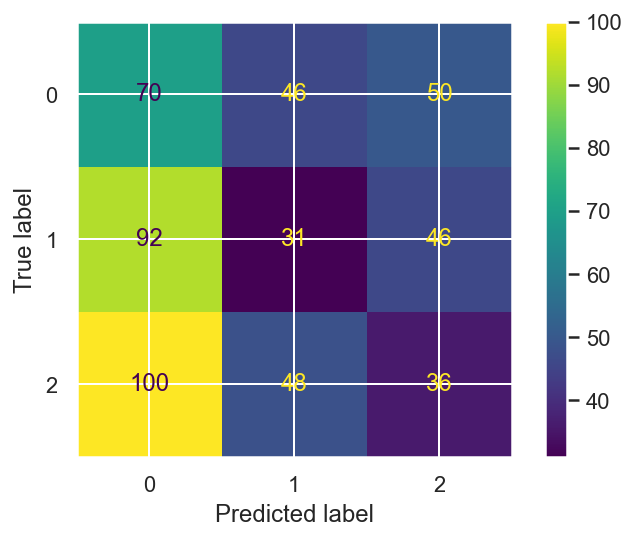

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)